In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

df=pd.read_csv('all_content_2020_v4.csv',na_values=['s','nd'])


### changement de data type de la variable MED20

df['MED20']=df['MED20'].astype(float)

## suppression des enregistrements

df_MED20=df.dropna(axis=0,subset=['MED20'])

print(df.shape)



(34955, 738)


C:\Users\dmoll_svp\AppData\Local\Temp\ipykernel_14636\3601457579.py:7: DtypeWarning: Columns (1,4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('all_content_2020_v4.csv',na_values=['s','nd'])


In [2]:
%config IPCompleter
%config IPCompleter.greedy=True

IPCompleter(Completer) options
----------------------------
IPCompleter.auto_close_dict_keys=<Bool>
    Enable auto-closing dictionary keys.
    When enabled string keys will be suffixed with a final quote (matching the
    opening quote), tuple keys will also receive a separating comma if needed,
    and keys which are final will receive a closing bracket (``]``).
    Current: False
IPCompleter.backslash_combining_completions=<Bool>
    Enable unicode completions, e.g. \alpha<tab> . Includes completion of latex
    commands, unicode names, and expanding unicode characters back to latex
    commands.
    Current: True
IPCompleter.debug=<Bool>
    Enable debug for the Completer. Mostly print extra information for
    experimental jedi integration.
    Current: False
IPCompleter.disable_matchers=<list-item-1>...
    List of matchers to disable.
            The list should contain matcher identifiers (see
    :any:`completion_matcher`).
    Current: []
IPCompleter.evaluation=<Enum>
    Po

(34955, 25)


,Complétude
MED20,89
PIMP20,15
TP6020,12
TP60AGE120,1
TP60AGE220,3
TP60AGE320,4
TP60AGE420,3
TP60AGE520,2
TP60AGE620,1
TP60TOL120,5


Complétude    11.041667
dtype: float64


Text(0.5, 1.0, 'Distribution du taux de complétude')

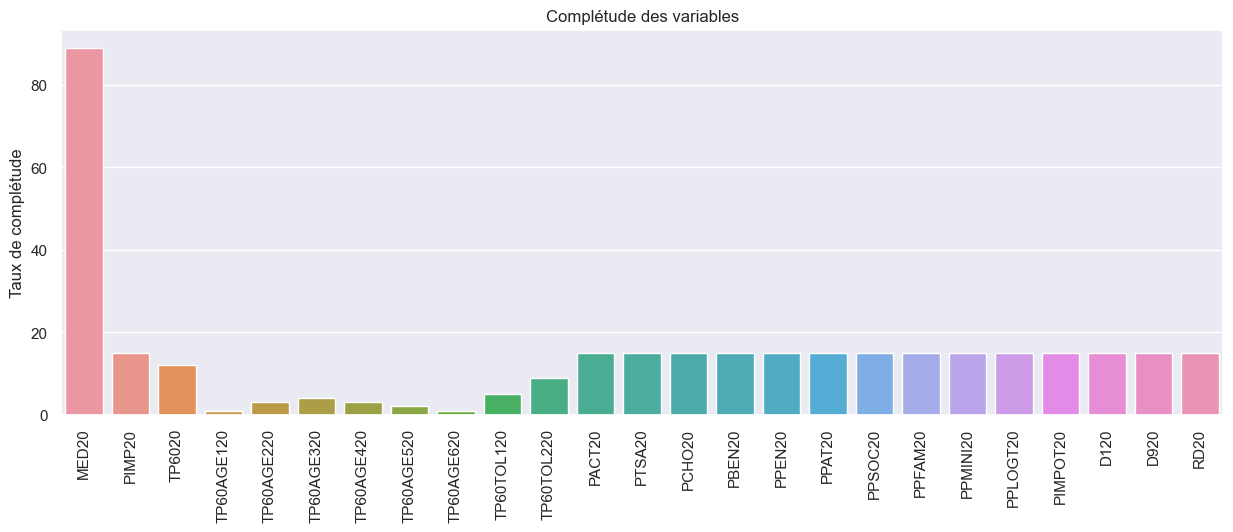

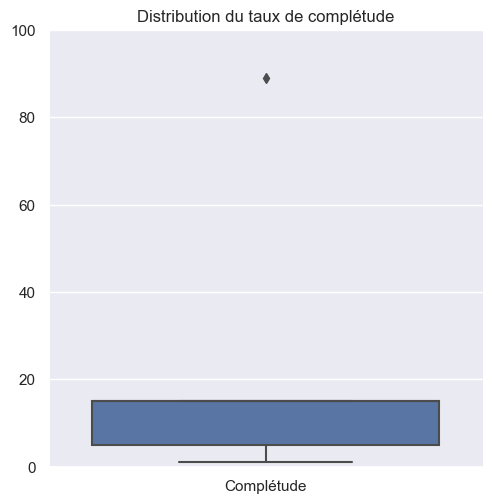

In [3]:
# les variables sur la pauvreté  / création d'un df dédié

df_pauv=df[[
'MED20',
'PIMP20',
'TP6020',
'TP60AGE120',
'TP60AGE220',
'TP60AGE320',
'TP60AGE420',
'TP60AGE520',
'TP60AGE620',
'TP60TOL120',
'TP60TOL220',
'PACT20',
'PTSA20',
'PCHO20',
'PBEN20',
'PPEN20',
'PPAT20',
'PPSOC20',
'PPFAM20',
'PPMINI20',
'PPLOGT20',
'PIMPOT20',
'D120',
'D920',
'RD20']]

print(df_pauv.shape)

# la complétude des données 

df_pauv_na=pd.DataFrame((((df_pauv.shape[0]-df_pauv.isna().sum())/df_pauv.shape[0])*100).astype(int), columns=['Complétude'])

display(df_pauv_na)

print(df_pauv_na.iloc[1:,:].mean())

plt.figure(figsize=(15,5))
sns.barplot(df_pauv_na.T)
plt.xticks(rotation=90);
plt.title('Complétude des variables')
plt.ylabel('Taux de complétude')

sns.catplot(df_pauv_na,kind='box')
plt.ylim([0,100])
plt.title('Distribution du taux de complétude')



,info,non_info,info_ideal,taux
nom_region,,,,
Auvergne-Rhône-Alpes,3742,287,4029,0.9
Bourgogne-Franche-Comté,3094,606,3700,0.8
Bretagne,1202,5,1207,1.0
Centre-Val de Loire,1695,62,1757,1.0
Corse,207,153,360,0.6
Grand Est,4229,892,5121,0.8
Guadeloupe,0,32,32,0.0
Guyane,0,22,22,0.0
Hauts-de-France,3513,275,3788,0.9


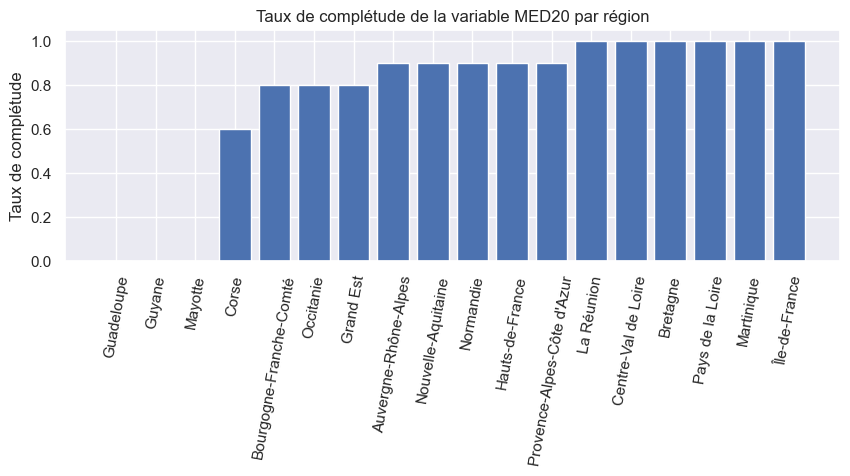

In [4]:
# estimer la représentativité de la variable MED20 par région

stat_reg_med20=pd.crosstab(df.nom_region,df.MED20.isna())
med20_t=pd.DataFrame(stat_reg_med20.iloc[:,:].values,index=stat_reg_med20.index,columns=['info','non_info'])
med20_t['info_ideal']=med20_t['info']+med20_t['non_info']
med20_t['taux']=med20_t['info']/med20_t['info_ideal']
med20_t['taux']=med20_t['taux'].round(1)

plt.figure(figsize=(10,3))
plt.bar(med20_t.sort_values(by='taux',ascending=True).index,med20_t.sort_values(by='taux',ascending=True).taux);
plt.xticks(rotation=80);
plt.ylabel('Taux de complétude')
plt.title ('Taux de complétude de la variable MED20 par région')

display(med20_t)

Text(0.5, 1.0, 'Taux de complétude de la variable TP6020 par région')

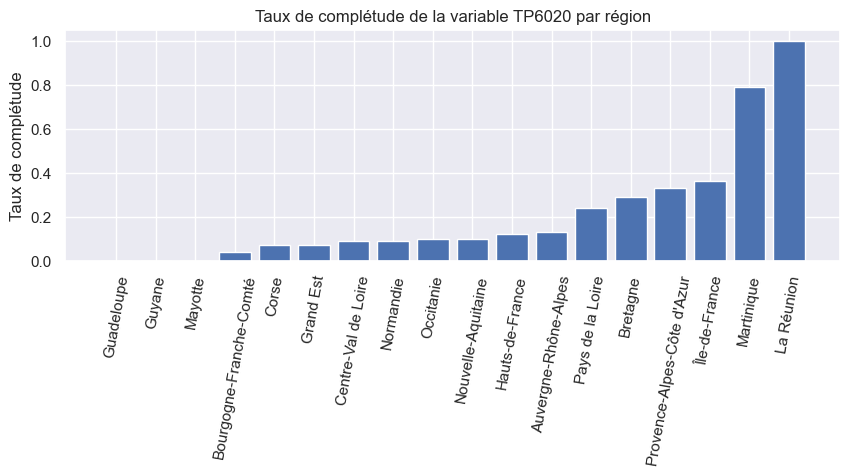

In [5]:
# taux de complétude de la variable TP6020

stat_reg_TP60=pd.crosstab(df.nom_region,df.TP6020.isna())
tp60_t=pd.DataFrame(stat_reg_TP60.iloc[:,:].values,index=stat_reg_TP60.index,columns=['info','non_info'])
tp60_t['info_ideal']=tp60_t['info']+tp60_t['non_info']
tp60_t['taux']=tp60_t['info']/tp60_t['info_ideal']
tp60_t['taux']=tp60_t['taux'].round(2)

                          
plt.figure(figsize=(10,3))
plt.bar(tp60_t.sort_values(by='taux',ascending=True).index,tp60_t.sort_values(by='taux',ascending=True).taux);
plt.xticks(rotation=80);
plt.ylabel('Taux de complétude')
plt.title ('Taux de complétude de la variable TP6020 par région')



In [6]:
# limitation du df au périmètre géographique

df=df[(df.nom_region!='Guadeloupe') &
     (df.nom_region!='Martinique') &
      (df.nom_region!='Guyane') & 
      (df.nom_region!='La Réunion') &
      (df.nom_region!='Mayotte') &
     (df.nom_region!='Corse') 
     ]



niveau de vie median moyen 22532.1
niveau de vie median median 22070.0
niveau de vie median min 11780.0
niveau de vie media max 51340.0


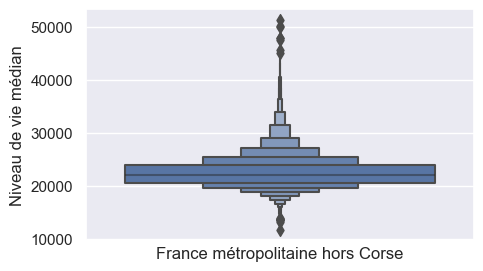

In [7]:
plt.figure(figsize=(5,3))

sns.boxenplot(y='MED20',data=df)
plt.xticks([])
plt.xlabel('France métropolitaine hors Corse')
plt.ylabel('Niveau de vie médian');

print( 'niveau de vie median moyen',df.MED20.mean().round(1))

print( 'niveau de vie median median',df.MED20.median())

print( 'niveau de vie median min',df.MED20.min())

print('niveau de vie media max', df.MED20.max())


In [8]:
# création du colonne MED20_Q - decomposition de la base en décile

df['MED20_D']=pd.qcut(df.MED20,q=10,labels=['1d','2d','3d','4d','5d','6d','7d','8d','9d','10d'])

MED20                  
          median      min      max
MED20_D                           
1d       18650.0  11780.0  19390.0
2d       19900.0  19400.0  20290.0
3d       20630.0  20300.0  20930.0
4d       21220.0  20940.0  21490.0
5d       21780.0  21500.0  22070.0
6d       22400.0  22080.0  22730.0
7d       23100.0  22740.0  23480.0
8d       23930.0  23490.0  24460.0
9d       25160.0  24470.0  26090.0
10d      27830.0  26100.0  51340.0

Text(0.5, 1.0, 'Niveau de vie médian des communes françaises par décile')

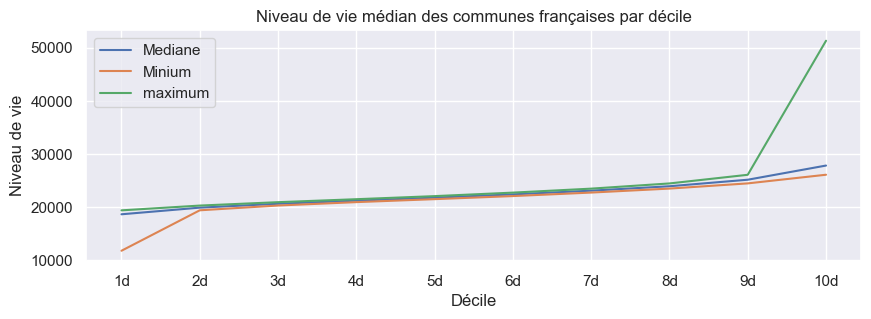

In [9]:
plt.figure(figsize=(10,3))
display(df.groupby('MED20_D').agg({'MED20':['median','min','max']}))
plt.plot(df.groupby('MED20_D').agg({'MED20':['median','min','max']}).index,
         df.groupby('MED20_D').agg({'MED20':['median','min','max']}),label=['Mediane','Minium','maximum'])
plt.legend();
plt.ylabel('Niveau de vie')
plt.xlabel('Décile')
plt.title('Niveau de vie médian des communes françaises par décile')

In [10]:
# création des centiles
# Label str
# resultat =[]
#for x in list(range(1,101)):
    #resultat.append(str(x)+'c')

df['MED20_C']=pd.qcut(df.MED20,q=100,labels=list(range(1,101)))
df.head()

,Unnamed: 0,CODGEO,EU_circo,num_region,num_dep,nom_commune,nom_dep,nom_region,num_chef_lieu,nom_chef_lieu,...,ETCFZ19,ETCGI19,ETCJZ19,ETCKZ19,ETCLZ19,ETCMN19,ETCOQ19,ETCRU19,MED20_D,MED20_C
0,0,1001,Sud-Est,84,1,L'Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,1.0,2.0,0.0,1.0,0.0,3.0,1.0,1.0,9d,83
1,1,1002,Sud-Est,84,1,L'Abergement-de-Varey,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,7d,67
2,2,1004,Sud-Est,84,1,Ambérieu-en-Bugey,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,27.0,41.0,9.0,5.0,10.0,27.0,27.0,21.0,4d,33
3,3,1005,Sud-Est,84,1,Ambérieux-en-Dombes,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,7.0,6.0,0.0,0.0,0.0,4.0,1.0,0.0,8d,80
4,4,1006,Sud-Est,84,1,Ambléon,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN


MED20                  
          median      min      max
MED20_C                           
1        16340.0  11780.0  16980.0
2        17400.0  16990.0  17700.0
3        17940.0  17710.0  18120.0
4        18290.0  18130.0  18410.0
5        18530.0  18420.0  18650.0
...          ...      ...      ...
96       28095.0  27820.0  28390.0
97       28800.0  28400.0  29240.0
98       29810.0  29250.0  30520.0
99       31680.0  30530.0  32880.0
100      35630.0  32910.0  51340.0

[100 rows x 3 columns]

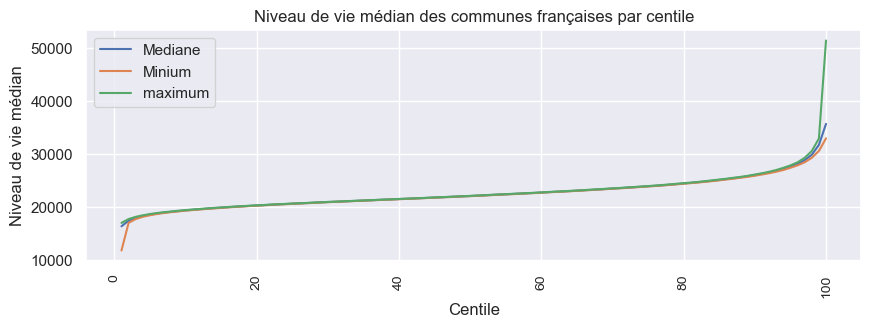

In [11]:
# représentation de MED20 par centile

display((df.groupby('MED20_C').agg({'MED20':['median','min','max']})))

plt.figure(figsize=(10,3))
plt.plot((df.groupby('MED20_C').agg({'MED20':['median','min','max']})).index,
         (df.groupby('MED20_C').agg({'MED20':['median','min','max']})),label=['Mediane','Minium','maximum'])
plt.legend();
plt.xticks(rotation=90,size=10)
plt.ylabel('Niveau de vie médian')
plt.xlabel('Centile')
plt.title('Niveau de vie médian des communes françaises par centile');



,MED20
,count
MED20_C,
1,315
2,306
3,315
4,311
5,323
...,...
96,310
97,310


moyenne du nombre de communes MED20  count    310.19
dtype: float64


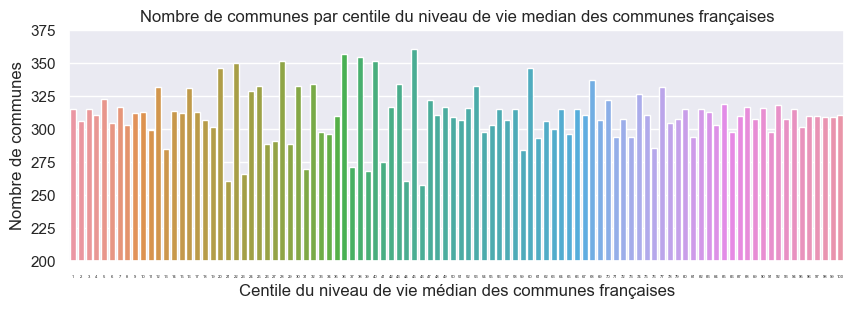

In [12]:
# nombre de commune par centile


display((df.groupby('MED20_C').agg({'MED20':['count']})))

print('moyenne du nombre de communes',(df.groupby('MED20_C').agg({'MED20':['count']})).mean())

plt.figure(figsize=(10,3))
sns.barplot(df.groupby('MED20_C').agg({'MED20':['count']}).T )
plt.xticks(size=3)
plt.ylim([200,375])
plt.title('Nombre de communes par centile du niveau de vie median des communes françaises')
plt.ylabel('Nombre de communes')
plt.xlabel('Centile du niveau de vie médian des communes françaises');

In [13]:
# Création de la variable "Niveau_de_vie"

def etiquette_nv (x) : 

    if x <11 :
        return 1
    elif x<31:
        return 2
    elif x<71:
        return 3
    elif x<91 :
        return 4
    elif x>90 :
        return 5
    else :
        return 'Problème'
    
df['Niveau_de_vie']=df.MED20_C.apply(lambda x : etiquette_nv(x))  

In [14]:
# vérification des nan

df[['MED20','MED20_D','MED20_C','Niveau_de_vie']].isna().sum()

#aucune perte d'info, les villes contenant des nan sur ces variables peuvent être supprimées

MED20            3447
MED20_D          3447
MED20_C          3447
Niveau_de_vie    3447
dtype: int64

In [15]:
# suppression des nan

df=df.dropna(axis=0,how='all',subset=['MED20','MED20_D','MED20_C','Niveau_de_vie'])

# vérification
df[['MED20','MED20_D','MED20_C','Niveau_de_vie']].isna().sum()

MED20            0
MED20_D          0
MED20_C          0
Niveau_de_vie    0
dtype: int64

In [16]:
# transformation de la dtype de 'Niveau_de_vie' en Int

df.Niveau_de_vie=df.Niveau_de_vie.astype('int')
df.Niveau_de_vie.info()


<class 'pandas.core.series.Series'>
Index: 31019 entries, 0 to 34825
Series name: Niveau_de_vie
Non-Null Count  Dtype
--------------  -----
31019 non-null  int32
dtypes: int32(1)
memory usage: 363.5 KB


Niveau_de_vie
1     3120
2     6234
3    12402
4     6173
5     3090
Name: nom_commune, dtype: int64


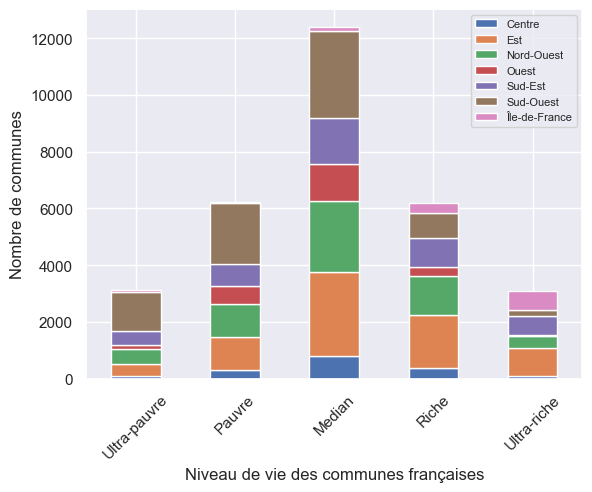

In [17]:
#PREMIERE ANALYSE DU NIVEAU DE VIE

# niveau de vie / par grande région  en nombre de communes.

print(df.groupby(['Niveau_de_vie'])['nom_commune'].count())

N_V=df.groupby(['EU_circo', 'Niveau_de_vie'])['nom_commune'].count().unstack().fillna(0).T

N_V.plot.bar(y=N_V.columns,stacked=True)
plt.xlabel('Niveau de vie des communes françaises')
plt.ylabel('Nombre de communes')
plt.xticks([0,1,2,3,4],['Ultra-pauvre','Pauvre','Median','Riche','Ultra-riche'],rotation=45)
plt.legend(fontsize=8 );


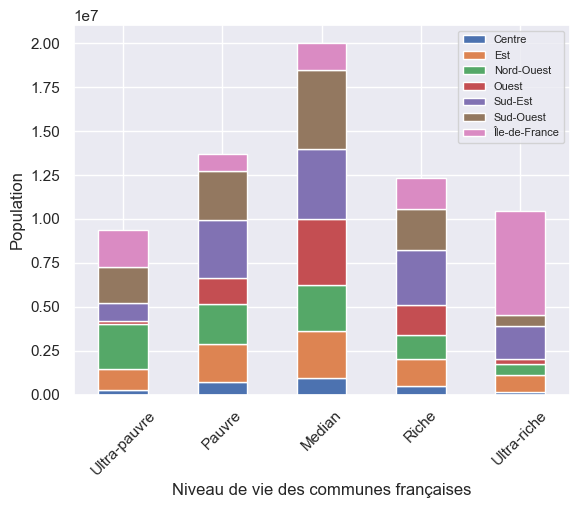

In [18]:
# niveau de vie / par grande région  en nombre d'habitants.

N_V=df.groupby(['EU_circo', 'Niveau_de_vie'])['pop_tot'].sum().unstack().fillna(0).T

N_V.plot.bar(y=N_V.columns,stacked=True)
plt.xlabel('Niveau de vie des communes françaises')
plt.ylabel('Population')
plt.xticks([0,1,2,3,4],['Ultra-pauvre','Pauvre','Median','Riche','Ultra-riche'],rotation=45)
plt.legend(fontsize=8 );


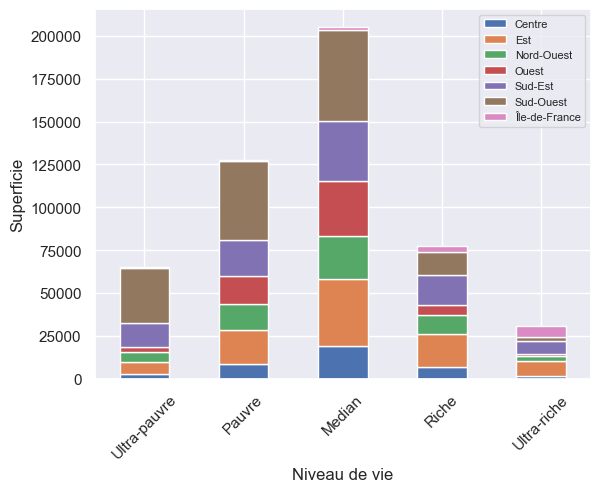

In [19]:

# niveau de vie / par grande région  en superficie.

N_V=df.groupby(['EU_circo', 'Niveau_de_vie'])['SUPERF'].sum().unstack().fillna(0).T

N_V.plot.bar(y=N_V.columns,stacked=True)
plt.xlabel('Niveau de vie')
plt.ylabel('Superficie')
plt.xticks([0,1,2,3,4],['Ultra-pauvre','Pauvre','Median','Riche','Ultra-riche'],rotation=45)
plt.legend(fontsize=8 );



In [20]:
import geopandas as gpd

# fichier json avec codegeo/code département / code région / intitulé commune / geometry 
# source https://www.data.gouv.fr/en/datasets/contours-des-communes-de-france-simplifie-avec-regions-et-departement-doutre-mer-rapproches/
# permalink https://www.data.gouv.fr/fr/datasets/r/00c0c560-3ad1-4a62-9a29-c34c98c3701e
# crs des donnees = 'EPSG:2154'
commune_gpd=gpd.read_file('a-com2022-topo-2154.json') 
commune_gpd.head()
commune_gpd.crs='EPSG:2154'


In [21]:
# limitation du fichier json sur le perimétre géographique de notre analyse france hors dom tom et corse

carte_gpd=commune_gpd[(commune_gpd.reg!='01') &
                    (commune_gpd.reg!='02') &
                    (commune_gpd.reg!='03') &
                    (commune_gpd.reg!='04') &
                    (commune_gpd.reg!='06') &
                    (commune_gpd.reg!='94')]

print(carte_gpd.reg.unique()) # verification de suppression des dom tom et de la corse
carte_gpd=carte_gpd.drop('id',axis=1) # suppresson de la colonne id
carte_gpd.info() # vérification du df

['84' '32' '93' '44' '76' '28' '75' '24' '27' '53' '52' '11']
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 34466 entries, 0 to 34954
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   codgeo    34466 non-null  object  
 1   dep       34466 non-null  object  
 2   reg       34466 non-null  object  
 3   xcl2154   34466 non-null  int64   
 4   ycl2154   34466 non-null  int64   
 5   libgeo    34466 non-null  object  
 6   geometry  34466 non-null  geometry
dtypes: geometry(1), int64(2), object(4)
memory usage: 2.1+ MB


34466


<Axes: >

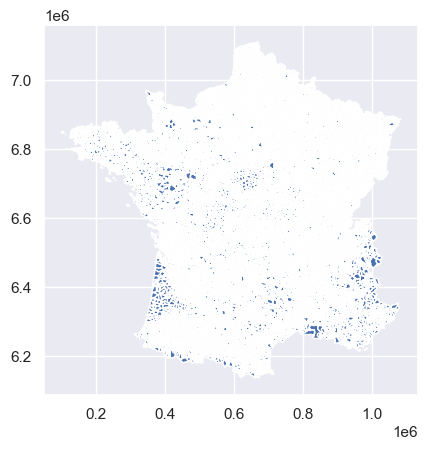

In [22]:
carte_gpd.crs='EPSG:2154'
print(carte_gpd.geometry.is_valid.count())   

carte_gpd.plot()

In [23]:
# création d'un df allégé pour geopandas => code commune + niveau de vie

df_gpd=df[['CODGEO','Niveau_de_vie']]
df_gpd.CODGEO=df_gpd.CODGEO.astype('str')
df_gpd.CODGEO=df_gpd.CODGEO.apply(lambda x : x.zfill(5))

df_gpd.head()

C:\Users\dmoll_svp\AppData\Local\Temp\ipykernel_14636\2664030899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpd.CODGEO=df_gpd.CODGEO.astype('str')
C:\Users\dmoll_svp\AppData\Local\Temp\ipykernel_14636\2664030899.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpd.CODGEO=df_gpd.CODGEO.apply(lambda x : x.zfill(5))


,CODGEO,Niveau_de_vie
0,01001,4
1,01002,3
2,01004,3
3,01005,4
5,01007,4


In [24]:
# merge de carte_gpd et df_gpd

carte_gpd=carte_gpd.merge(right=df_gpd,left_on='codgeo',right_on='CODGEO',how='left')
carte_gpd.crs='EPSG:2154'
carte_gpd.head()

,codgeo,dep,reg,xcl2154,ycl2154,libgeo,geometry,CODGEO,Niveau_de_vie
0,01001,01,84,848241,6563021,L'Abergement-Clémenciat,"POLYGON ((846981.436 6564107.360, 847017.457 6...",01001,4.0
1,01002,01,84,887495,6548152,L'Abergement-de-Varey,"POLYGON ((886027.651 6548170.900, 886157.325 6...",01002,3.0
2,01004,01,84,882724,6542583,Ambérieu-en-Bugey,"POLYGON ((884889.404 6539629.931, 884795.750 6...",01004,3.0
3,01005,01,84,847277,6545791,Ambérieux-en-Dombes,"POLYGON ((845951.250 6547999.078, 846073.720 6...",01005,4.0
4,01006,01,84,902191,6519791,Ambléon,"POLYGON ((901336.361 6521123.305, 902460.201 6...",NaN,NaN


In [25]:
# vérification des nan
print(carte_gpd.CODGEO.isna().sum())

# suppression des nan sur la variable "niveau de vie"

carte_gpd=carte_gpd.dropna(subset='Niveau_de_vie')

print(carte_gpd.Niveau_de_vie.isna().sum())  # vérification des nan sur la variable niveau de vie

carte_gpd.head()



3447
0


,codgeo,dep,reg,xcl2154,ycl2154,libgeo,geometry,CODGEO,Niveau_de_vie
0,01001,01,84,848241,6563021,L'Abergement-Clémenciat,"POLYGON ((846981.436 6564107.360, 847017.457 6...",01001,4.0
1,01002,01,84,887495,6548152,L'Abergement-de-Varey,"POLYGON ((886027.651 6548170.900, 886157.325 6...",01002,3.0
2,01004,01,84,882724,6542583,Ambérieu-en-Bugey,"POLYGON ((884889.404 6539629.931, 884795.750 6...",01004,3.0
3,01005,01,84,847277,6545791,Ambérieux-en-Dombes,"POLYGON ((845951.250 6547999.078, 846073.720 6...",01005,4.0
5,01007,01,84,882682,6548067,Ambronay,"POLYGON ((886027.651 6548170.900, 886971.388 6...",01007,4.0


In [26]:
carte_gpd.Niveau_de_vie=carte_gpd.Niveau_de_vie.astype(int) # change dtype pour le niveau de vie en int
# ,label=['ultra-pauvre','pauvre','median','riche','ultra-riche']


<Axes: >

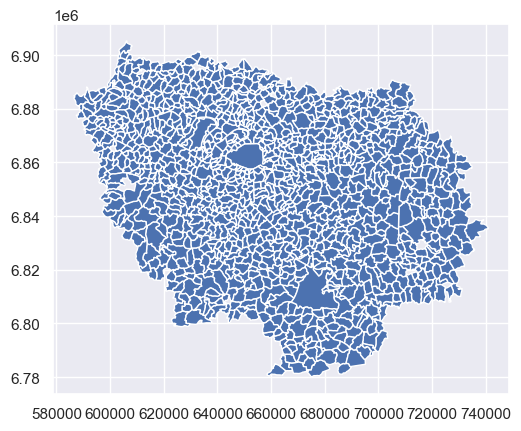

In [57]:
carte_gpd[carte_gpd.reg=='11'].plot()


In [28]:
# VARIABLES EXPLICATIVES SOCIO DEMOGRAPHIQUES##

# complétude des variables


## AGE DE LA POPULATION :

# 'P19_POP0014' Question ???? la variable n'est pas dans la base ??
age_population=['P19_POP','P19_POP1529','P19_POP3044','P19_POP4559','P19_POP6074','P19_POP7589']
for i in age_population :
    print ('nbre de nan pour',str(i),':',df[i].isna().sum(),'\n')

# COMPOSITION DES MENAGES : 

print('Nombre de ménages en 2019 C19_MEN ',df.C19_MEN.isna().sum())
print("Nombre de ménages d'une personne en 2019 C19_MENPSEUL",df.C19_MENPSEUL.isna().sum())
print("Nombre de ménages dont la famille principale est formée d'un couple sans enfant en 2019 C19_MENCOUPSENF",df.C19_MENCOUPSENF.isna().sum())

print("Nombre de ménages dont la famille principale est formée d'un couple avec enfant(s) C19_MENCOUPAENF en 2019",df.C19_MENCOUPAENF.isna().sum())
print("Nombre de ménages dont la famille principale est une famille monoparentale en 2019", df.C19_MENFAMMONO.isna().sum())
    

nbre de nan pour P19_POP : 0 

nbre de nan pour P19_POP1529 : 0 

nbre de nan pour P19_POP3044 : 0 

nbre de nan pour P19_POP4559 : 0 

nbre de nan pour P19_POP6074 : 0 

nbre de nan pour P19_POP7589 : 0 

Nombre de ménages en 2019 C19_MEN  0
Nombre de ménages d'une personne en 2019 C19_MENPSEUL 0
Nombre de ménages dont la famille principale est formée d'un couple sans enfant en 2019 C19_MENCOUPSENF 0
Nombre de ménages dont la famille principale est formée d'un couple avec enfant(s) C19_MENCOUPAENF en 2019 0
Nombre de ménages dont la famille principale est une famille monoparentale en 2019 0


In [29]:
#VARIABLES EXPLICATIVES SOCIO DEMOGRAPHIQUES ##

# création des variables  socio démographiques ##
# principe => création de ratios => valeur de la variable spécifique / sur population globale

#AGE DE LA POPULATION###

age_population=['P19_POP1529','P19_POP3044','P19_POP4559','P19_POP6074','P19_POP7589']

for i in age_population :
    y='R_'+i
    df[y]=df[i]/df.P19_POP
    print(y)

R_P19_POP1529
R_P19_POP3044
R_P19_POP4559
R_P19_POP6074
R_P19_POP7589


In [30]:
# vérification
df.R_P19_POP1529.head()

0    0.131538
1    0.115662
2    0.217687
3    0.153199
5    0.140357
Name: R_P19_POP1529, dtype: float64

In [31]:
#VARIABLES EXPLICATIVES SOCIO DEMOGRAPHIQUES ##

# création des variables  socio démographiques ##
# principe => création de ratios => valeur de la variable spécifique / sur population globale

#COMPOSITION DES MENAGES ###

In [32]:
#COMPOSITION DES MENAGES ###

compo_menage=['C19_MENPSEUL','C19_MENCOUPSENF','C19_MENCOUPAENF','C19_MENFAMMONO']

for i in compo_menage :
    y='R_'+i
    df[y]=df[i]/df.C19_MEN
    print(y)

R_C19_MENPSEUL
R_C19_MENCOUPSENF
R_C19_MENCOUPAENF
R_C19_MENFAMMONO


In [33]:
# vérification
df.R_C19_MENPSEUL.head()

0    0.234967
1    0.280513
2    0.438516
3    0.250000
5    0.289362
Name: R_C19_MENPSEUL, dtype: float64

In [48]:
df.shape

(31019, 750)

In [50]:
# CREATION D'UN JEU DE DONNEES SUR LE MACHINE LEARNING
# pour que le système fonctionne mieux ont supprime du jeu de données les commune ayant un niveau de vie median
df_ml=df[df.Niveau_de_vie!=3]
print(df_ml.Niveau_de_vie.unique())

# codification du niveau de vie en booléen. 1 et 2 = 1 (pauvre) / 4 et 5 = 0 (non pauvre, riche) 
replace_nv={2:1,4:0,5:0}

df_ml.replace(replace_nv,inplace=True)
print(df_ml.Niveau_de_vie.unique()) # vérification du replace
df_ml.info()  # vérification du df

[4 5 2 1]
[0 1]
<class 'pandas.core.frame.DataFrame'>
Index: 18617 entries, 0 to 34825
Columns: 750 entries, Unnamed: 0 to R_C19_MENFAMMONO
dtypes: category(2), float64(652), int32(1), int64(65), object(30)
memory usage: 106.4+ MB


C:\Users\dmoll_svp\AppData\Local\Temp\ipykernel_14636\73696803.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml.replace(replace_nv,inplace=True)


In [56]:
### VARIABLE EXPLICATIVE => X  ###
### les variables explicatives n'ont pas besoin d'etre encodées => float
# la normalisation ou la standardisation ne semble pas nécessaire puisque les variables explicative sont des ratios.



variable_explicative=['R_P19_POP3044','R_P19_POP4559','R_P19_POP6074','R_P19_POP7589',
                      'R_C19_MENPSEUL','R_C19_MENCOUPSENF','R_C19_MENCOUPAENF','R_C19_MENFAMMONO']

X=df_ml[variable_explicative] # création de X (variable explicative)

X.info()  # vérification de X

<class 'pandas.core.frame.DataFrame'>
Index: 18617 entries, 0 to 34825
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   R_P19_POP3044      18617 non-null  float64
 1   R_P19_POP4559      18617 non-null  float64
 2   R_P19_POP6074      18617 non-null  float64
 3   R_P19_POP7589      18617 non-null  float64
 4   R_C19_MENPSEUL     18617 non-null  float64
 5   R_C19_MENCOUPSENF  18617 non-null  float64
 6   R_C19_MENCOUPAENF  18617 non-null  float64
 7   R_C19_MENFAMMONO   18617 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


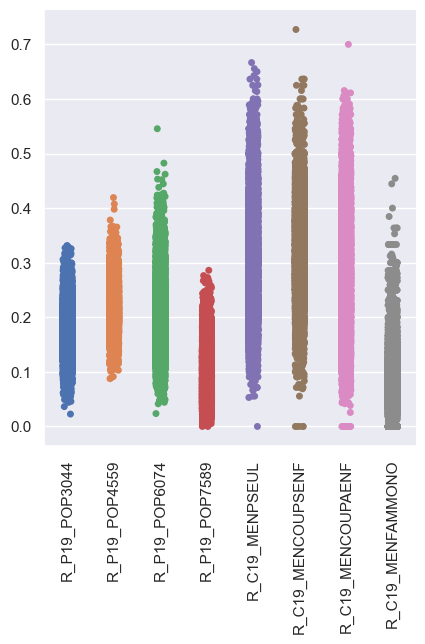

In [76]:
# la normalisation ou la standardisation ne semble pas nécessaire puisque les variables explicative sont des ratios.
sns.catplot(X)
plt.xticks(rotation=90);

In [58]:
### VARIABLE CIBLE => Y ###
# l'encodage n'est pas nécessaire, la variable y est int (0/1)

y=df_ml['Niveau_de_vie'] # création du y ( variable cible)
y.info() # vérification de y 


<class 'pandas.core.series.Series'>
Index: 18617 entries, 0 to 34825
Series name: Niveau_de_vie
Non-Null Count  Dtype
--------------  -----
18617 non-null  int32
dtypes: int32(1)
memory usage: 218.2 KB


<Axes: >

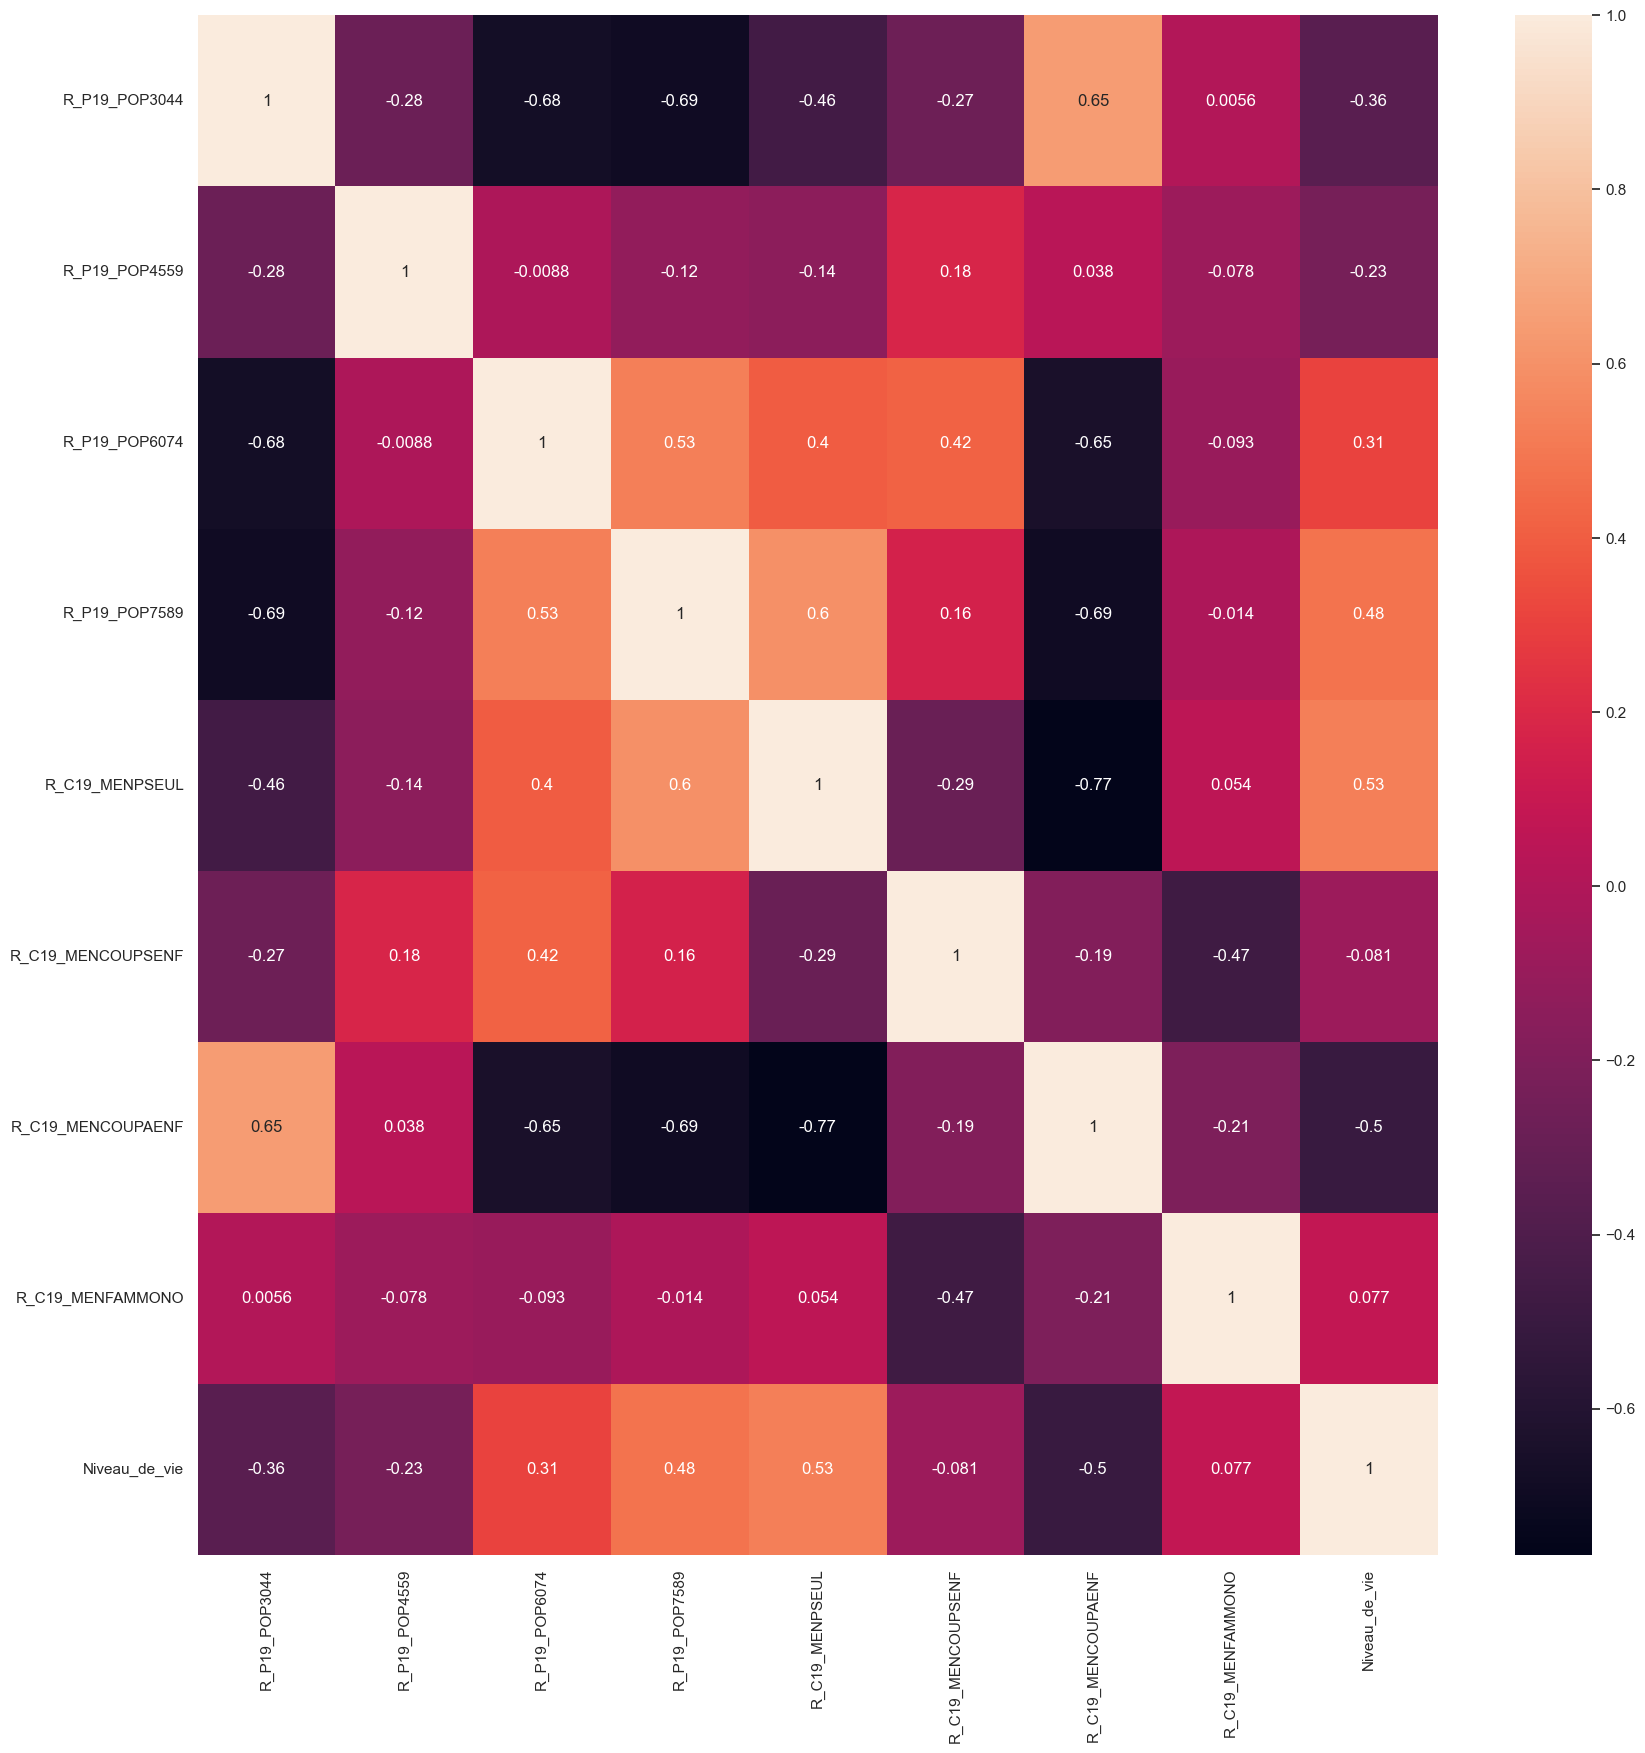

In [71]:
# création d'un df qui reprend la variable cible et explicative pour faire une heatmap, avant machine learning.
df_xy=pd.concat([X,y],axis=1)
df_xy.head()
df_xy.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_xy.corr(),annot=True)

# les variable sociodemographique ne sont pas correle avec le niveau de vie

In [61]:
# APPLICATION DE LA METHODE HOLD UP 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [115]:
#### REGRESSION LOGISTIQUE####
# variable cible catégorielle discrete, variables explicatives continues


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
prediction_LR=model.predict(X_test)

In [119]:
#### REGRESSION LOGISTIQUE#### RESULTATS
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report

print("accuracy")

print("matrice de confusion",confusion_matrix(y_test,prediction_LR))

print ("rapport de classification", classification_report(y_test, prediction_LR))

accuracy
matrice de confusion [[1833  433]
 [ 547 1842]]
rapport de classification               precision    recall  f1-score   support

           0       0.77      0.81      0.79      2266
           1       0.81      0.77      0.79      2389

    accuracy                           0.79      4655
   macro avg       0.79      0.79      0.79      4655
weighted avg       0.79      0.79      0.79      4655



In [131]:
#### ARBRE DE CLASSIFICATION #### 

from sklearn.tree import DecisionTreeClassifier
modele_TC = DecisionTreeClassifier (random_state=42,max_depth=3)
modele_TC.fit(X_train,y_train)
prediction_TC=modele.predict(X_test)


In [132]:
#### REGRESSION DE CLASSIFICATION#### RESULTATS
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report

print("accuracy")

print("matrice de confusion",confusion_matrix(y_test,prediction_TC))

print ("rapport de classification", classification_report(y_test, prediction_TC))

accuracy
matrice de confusion [[1659  607]
 [ 666 1723]]
rapport de classification               precision    recall  f1-score   support

           0       0.71      0.73      0.72      2266
           1       0.74      0.72      0.73      2389

    accuracy                           0.73      4655
   macro avg       0.73      0.73      0.73      4655
weighted avg       0.73      0.73      0.73      4655



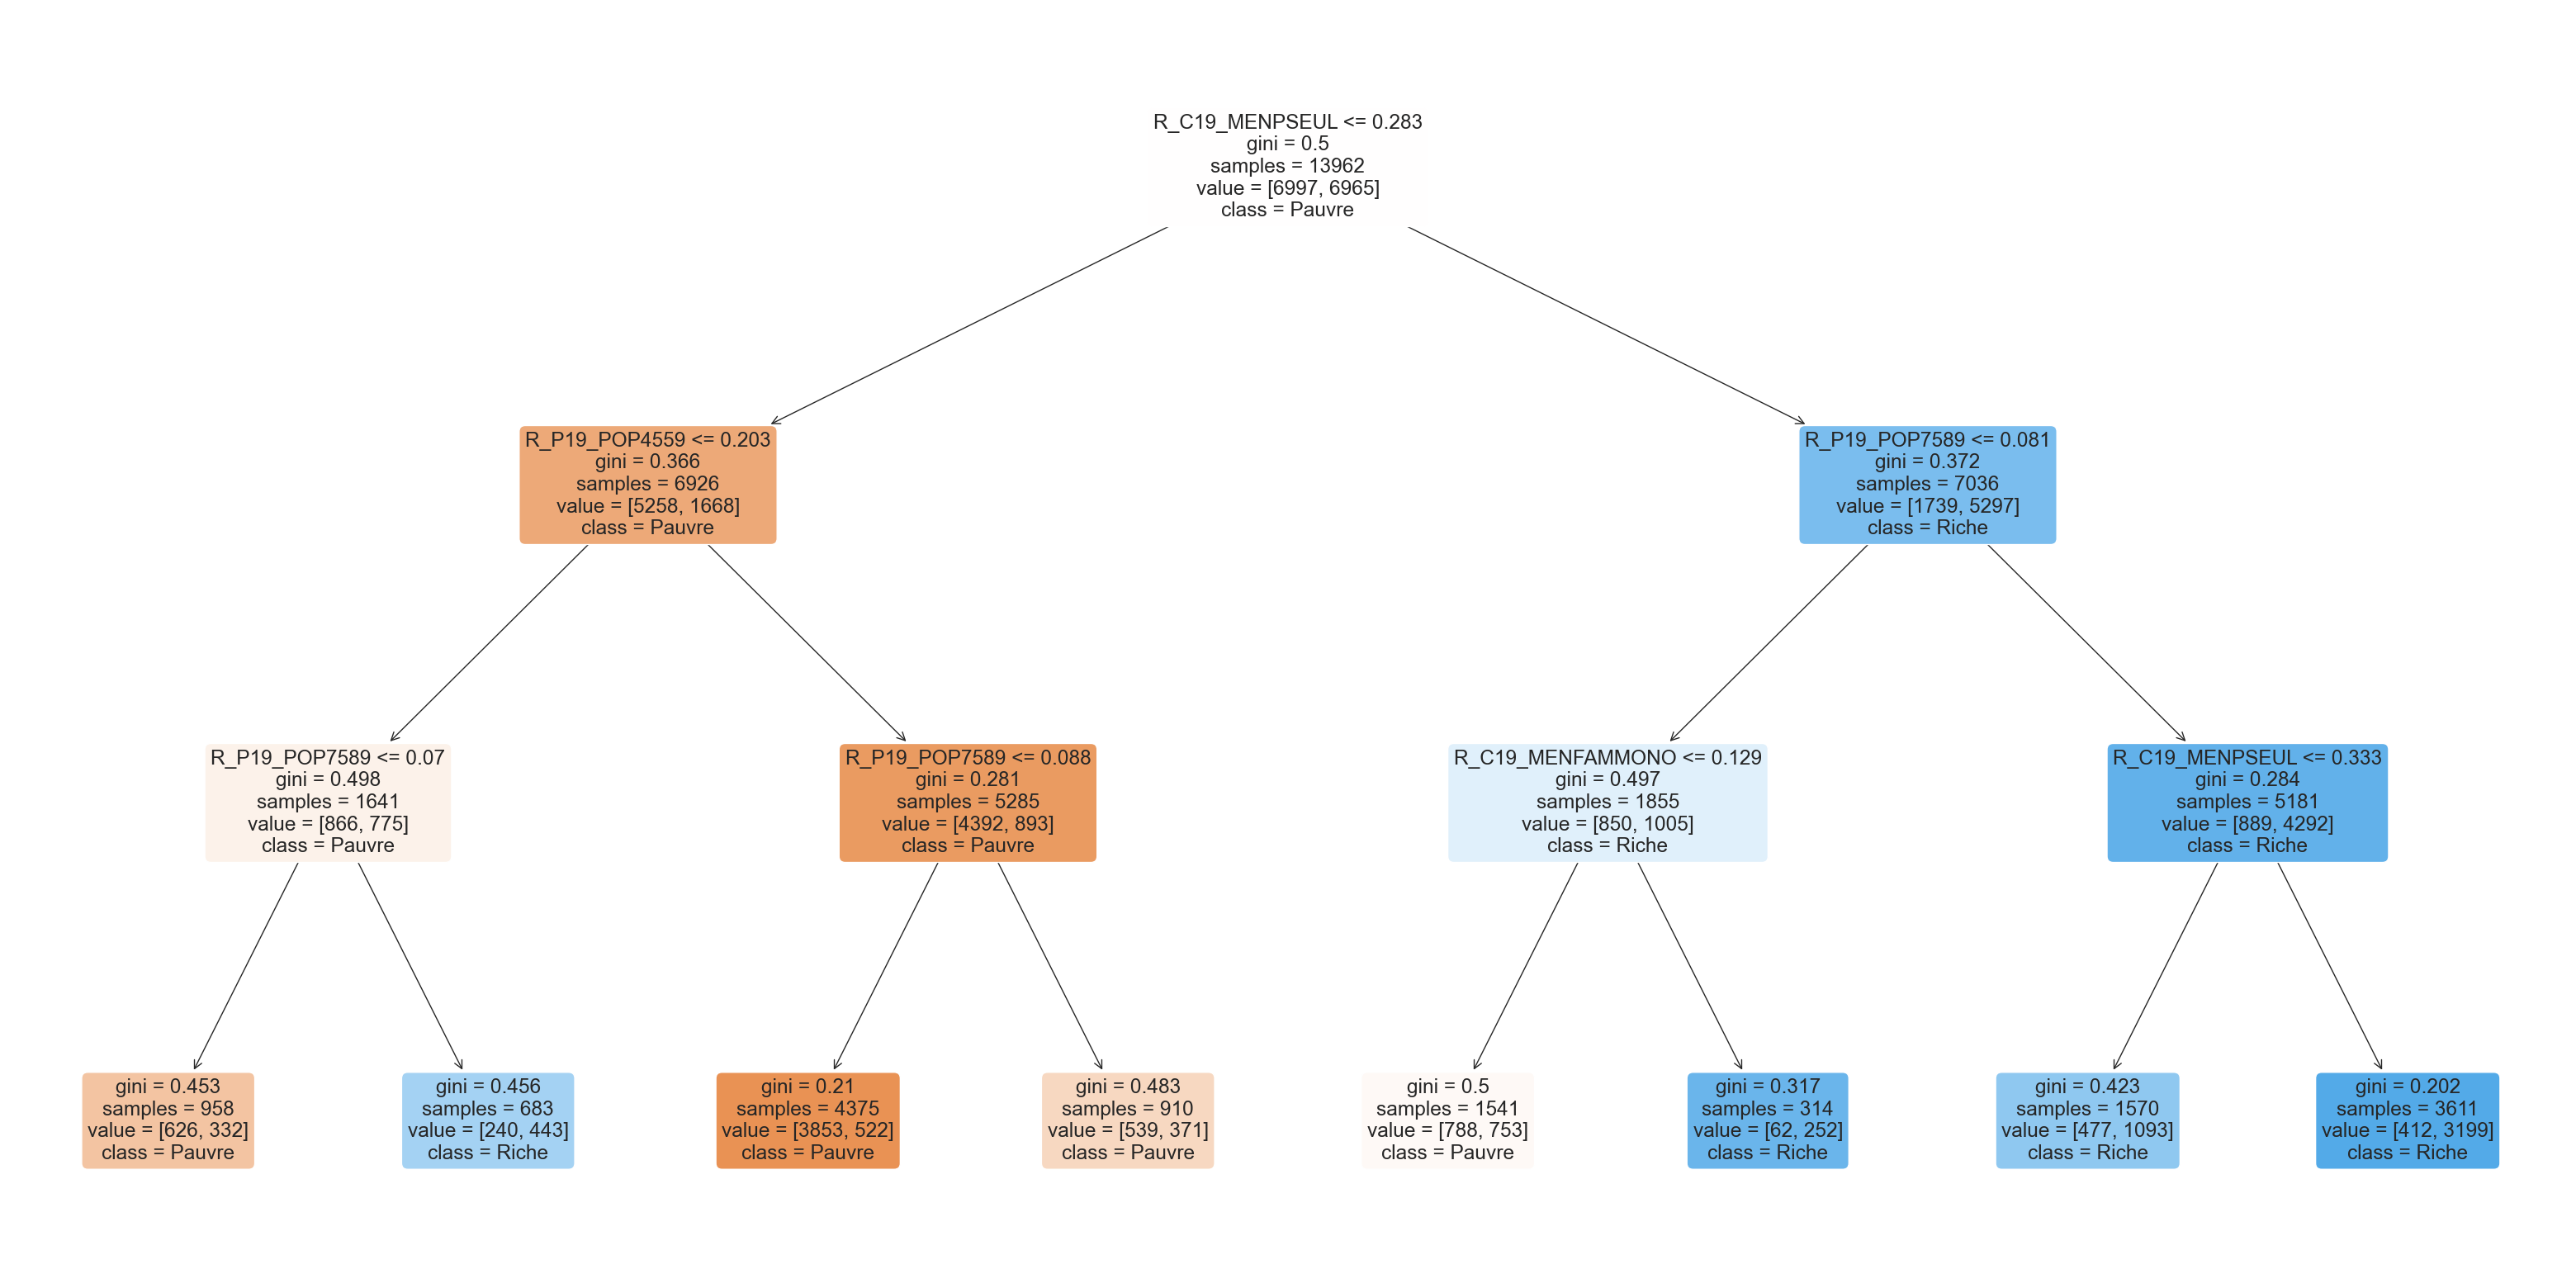

In [135]:
# VISUALISATON DE L'ARBRE DE CLASSIFICATION

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(40, 20))

plot_tree(modele_TC,
          feature_names=X.columns,
          class_names=['Pauvre', 'Riche'],
          filled=True,
          rounded=True)

plt.show()


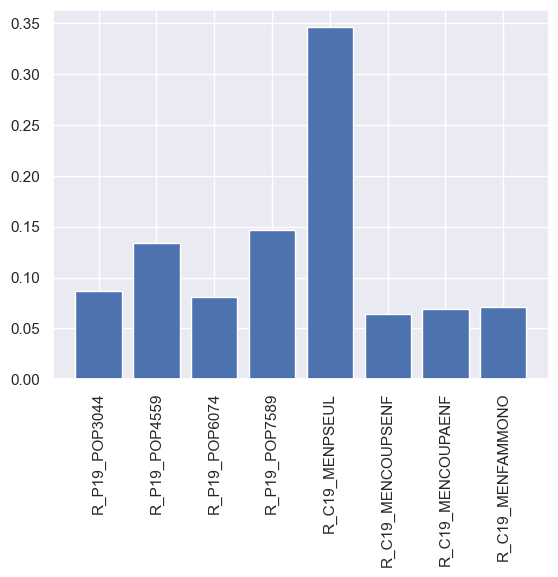

In [157]:
FI=pd.DataFrame(modele.feature_importances_,columns=['valeur']).T
FI.columns=X.columns

plt.bar(FI.columns,FI.loc['valeur'])
plt.xticks(rotation=90);

